# Udacity Machine Learning Capstone Project

## Falls Creek Snow Depth Forecast - Data Sourcing

This notebook explores the raw datasources.

Datasource 1 is downloaded with R and manipulated as per 'Capstone Project - DEEPAR TIMESERIES DATA GRAB.Rmd'  The CSV is saved to the github file for use in data manipulation, refer to the RMD and PDF in the GITHUB repo for details on the manipulation involved.

Datasource 2 are downloaded directly from the Bureau of Meterology and include time series data for

> 1. Maximum Tempearture
> 2. Daily Rainfall

Datasource 2 has been downloaded as a secondary time series for the prediction model.



##### Dataset 1

* File Source 1 sourced as a csv from data.gov.au as per the below website.

> https://arcc.vic.gov.au/wp-content/uploads/2021/06/Data-2020-Daily-Snow-Depth-Records_Falls-Creek.csv'

This dataset was found and located for assignment 1.  It will be reused and combined with the second dataset.

##### Dataset 2

* File Source 2 sourced as csvs from bom.gov.au (http://www.bom.gov.au/climate/data/stations/)

> http://www.bom.gov.au/

Each year was individually loaded and the CSV was concatenated to make a final output variable file.  Refer to the following for

##### Maximum Temperature

> https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2016_Data.csv
> https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2018_Data.csv
> https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2019_Data.csv
> https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2020_Data.csv
> https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2021_Data.csv

##### Daily Rain Fall
> https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2016_Data.csv')
> https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2017_Data.csv')
> https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2018_Data.csv')
> https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2019_Data.csv')
> https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2020_Data.csv')
> https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2021_Data.csv')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Dataset 1 - Snow Depth

As mentioned, using R and DPLYR was a more robust method for pulling in data in the raw dataset.  The pandas process dropped a large portion of data points.  The R script involves.

1. Download the dataset
2. Remove unwanted rows
3. Remove unwanted columns, the original dataset included natural snowdepth and man made snow depth.  For the purposes of the exercise and to get more datapoints natural snow depth was used.
4. Each year was in an individual column (untidy) so this was gathered (melted) into a single column (one variable snow depth) and combined with the single date field to make key columns date and snow depth (time series)
5. The data was exported to a CSV and as falls1.csv and uploaded to the GIT account.
6. The CSV file was uploaded into Python for further manipulation and treatment.
7. The date field was parsed as a date for use as a time series variable.
8. Missing values were treated and removed by using last know value.


In [2]:
# Downloading the csv file from your account
url = 'https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/falls1.csv'
 
snow = pd.read_csv(url)
snow = snow.drop(columns = ['Unnamed: 0'])
snow['date']  =  pd.to_datetime(snow['date'] , format='%Y-%m-%d')
snow.isna().sum()

date            0
snow_depth    176
month           0
year            0
dtype: int64

In [3]:
snow.head()

,date,snow_depth,month,year
0,2020-06-05,NaN,6,2020
1,2020-06-06,0.0,6,2020
2,2020-06-07,0.0,6,2020
3,2020-06-08,0.0,6,2020
4,2020-06-09,0.0,6,2020


Check datatypes, ensure that the date is parsed as a date for use in time series modelling.  Following this review for missing data and use inplace replacement with forward fill to treat.

In [4]:
snow.dtypes

date          datetime64[ns]
snow_depth           float64
month                  int64
year                   int64
dtype: object

In [5]:
snow.fillna(method='bfill', inplace=True)
snow.isna().sum()

date          0
snow_depth    8
month         0
year          0
dtype: int64

In [6]:
snow.fillna(method='ffill', inplace=True)
snow.isna().sum()

date          0
snow_depth    0
month         0
year          0
dtype: int64

In [7]:
snow.dtypes

date          datetime64[ns]
snow_depth           float64
month                  int64
year                   int64
dtype: object

In [9]:
snow.head()

,date,snow_depth,month,year
0,2020-06-05,0.0,6,2020
1,2020-06-06,0.0,6,2020
2,2020-06-07,0.0,6,2020
3,2020-06-08,0.0,6,2020
4,2020-06-09,0.0,6,2020


In [8]:
# Export to CSV
snow.to_csv('snow.csv', index = False)

In [62]:
snow_data = snow.copy()
snow_data = snow.drop(columns = ['month','year'])
snow_data.to_csv('snow_data.csv', index = False)
snow_data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
date,2020-06-05 00:00:00,2020-06-06 00:00:00,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00,2020-06-17 00:00:00,2020-06-18 00:00:00,2020-06-19 00:00:00,2020-06-20 00:00:00,2020-06-21 00:00:00,2020-06-22 00:00:00,2020-06-23 00:00:00,2020-06-24 00:00:00
snow_depth,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,14,9


In [10]:
snow_df = snow.set_index('date')

# Select just snow depth
snow_df = snow_df['snow_depth'].copy()
print(snow_df.shape)

(1905,)


In [67]:
snow_df.describe()

count    1905.000000
mean       67.465092
std        51.858718
min         0.000000
25%        20.000000
50%        66.000000
75%       103.000000
max       217.000000
Name: snow_depth, dtype: float64

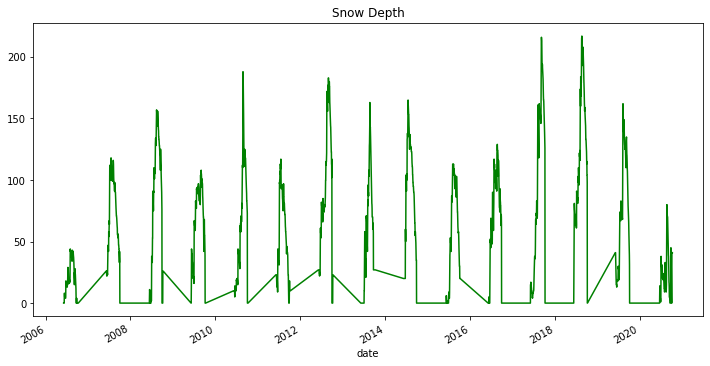

In [11]:
# display the data 
plt.figure(figsize=(12,6))
# all data points
snow_df.plot(title='Snow Depth', color='green') 
plt.show()

In [12]:
snow.head()

,date,snow_depth,month,year
0,2020-06-05,0.0,6,2020
1,2020-06-06,0.0,6,2020
2,2020-06-07,0.0,6,2020
3,2020-06-08,0.0,6,2020
4,2020-06-09,0.0,6,2020


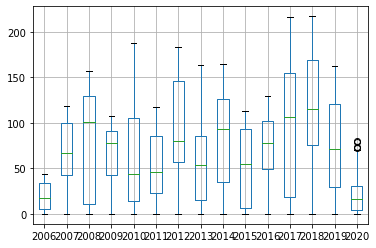

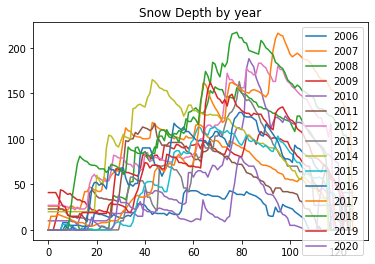

In [44]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

url = 'https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/snow_data.csv'

series = read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)

groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
years.plot(title='Snow Depth by year')
pyplot.show()

## Benchmark Model

We are looking to create a benchmark model to baseline any model against.  The simplest way to present data is to provide the mean results, depending on the statistical spread of the results, in theory this could be a good approximation.  If a machine learning model can't be better than this, then there are some assumptions that would need to be reviewed including the suitability of the data set for modelling and the modelling technique employed

To do this we copy the original file and use pandas functions to create a new dataframe

In [15]:
benchmark = snow.copy()
# We need to extract the day, looking to aggregate values for day

benchmark['day'] = benchmark['date'].dt.day
benchmark = benchmark.drop(columns = ['year'])

In [49]:
# Copy the existing dataframe
baselinemodel = snow.copy()

# We need to extract the day, looking to aggregate values for day
baselinemodel['day'] = baselinemodel['date'].dt.day

# drop year to simplify aggregation
baselinemodel = baselinemodel.drop(columns = ['year'])

# use groupby to determine the mean for each day and month, reset index to make a new dataframe.
baselinemodel = benchmark.groupby(['month','day']).mean().reset_index()
baselinemodel['year'] = 1900
baselinemodel['date'] = pd.to_datetime(baselinemodel[['year', 'month', 'day']])
baselinemodel = baselinemodel.drop(columns = ['month','day','year'])


#reorder columns
baselinemodel = baselinemodel[['date', 'snow_depth']]
# create a CSV.

baselinemodel.to_csv('baselinemodel.csv', index = False)

baselinemodel.head()

,date,snow_depth
0,1900-06-05,9.800000
1,1900-06-06,10.800000
2,1900-06-07,10.800000
3,1900-06-08,11.466667
4,1900-06-09,11.933333


<Figure size 864x432 with 0 Axes>

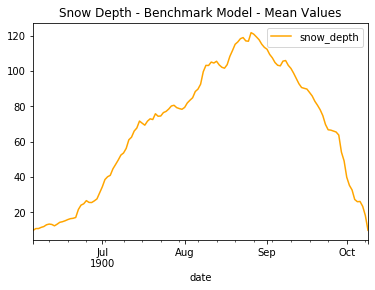

In [17]:
# display the data 
plt.figure(figsize=(12,6))

#create dataframe and set index
basegraph = baselinemodel.copy()
basegraph = basegraph.set_index('date')

# all data points
basegraph.plot(title='Snow Depth - Benchmark Model - Mean Values', color='orange') 
plt.show()

Lets look to combine the average (benchmark) to the dataset for visualisation and understanding.

In [54]:
viz = pd.concat([snow_data,baselinemodel])
viz.to_csv('viz.csv', index = False)

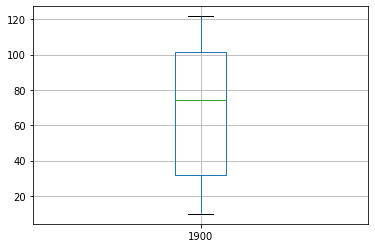

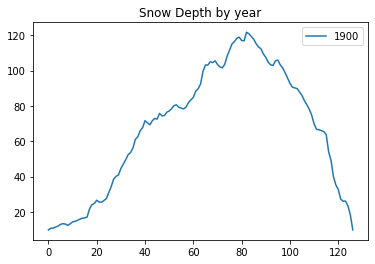

In [60]:
url = 'https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/baselinemodel.csv'

series = read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True)

groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
years.plot(title='Snow Depth by year')
pyplot.show()

## Dataset 2 - Weather Variables

The Bureau of Meteorlogy (BOM) information is downloaded, variable by variable (rain and temperature) and year by year.  The below create two functions that download the data and remove non relevant fields including parsing date as required to create a output dataframe for each year.  Following this each individual dataset is passed through the function, a dataframe extracted for each year and then concatenated into a final dataset.

In [18]:
def get_git_csv_temp(url):
    '''Reads in a csv file which is assumed to have the following columns
    'Product code'
    'Bureau of Meteorology station number'
    'Year'
    'Month'
    'Day'
    'Maximum temperature (Degree C)'
    'Days of accumulation of maximum temperature'
    'Quality'
    
       This function does two things: 
       1) Drops Unwanted Columns 
       2) Parses Date Column

       Source texts have a special label, -1.
       :param csv_file: The directory for the file_information.csv file
       :return: A dataframe with date and Maximum temperature'''
    
    # Pass the csv file to a create a dataframe for pre processing.
    df = pd.read_csv(url)
    
    df = df.drop(columns = ['Product code',
                            'Bureau of Meteorology station number',
                            'Days of accumulation of maximum temperature',
                            'Quality'])
    # Parse the date column
    df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    
    # Drop the unwanted columns
    df = df.drop(columns = ['Year', 'Month', 'Day'])
    
    return df

In [19]:
def get_git_csv_rain(url):
    '''Reads in a csv file which is assumed to have the following columns
    'Product code'
    'Bureau of Meteorology station number'
    'Year'
    'Month'
    'Day'
    'Maximum temperature (Degree C)'
    'Days of accumulation of maximum temperature'
    'Quality'
    
       This function does two things: 
       1) Drops Unwanted Columns 
       2) Parses Date Column

       Source texts have a special label, -1.
       :param csv_file: The directory for the file_information.csv file
       :return: A dataframe with date and Maximum temperature'''
    
    # Pass the csv file to a create a dataframe for pre processing.
    df = pd.read_csv(url)
    
    df = df.drop(columns = ['Product code',
                            'Bureau of Meteorology station number',
                            'Period over which rainfall was measured (days)',
                            'Quality'])
    # Parse the date column
    df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    
    # Drop the unwanted columns
    df = df.drop(columns = ['Year', 'Month', 'Day'])
    
    return df

In [20]:
# Apply each function to download the individual datasets
temp_2016 = get_git_csv_temp('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2016_Data.csv')
temp_2017 = get_git_csv_temp('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2017_Data.csv')
temp_2018 = get_git_csv_temp('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2018_Data.csv')
temp_2019 = get_git_csv_temp('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2019_Data.csv')
temp_2020 = get_git_csv_temp('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2020_Data.csv')
temp_2021 = get_git_csv_temp('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/MAXT_IDCJAC0010_083084_2021_Data.csv')

rain_2016 = get_git_csv_rain('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2016_Data.csv')
rain_2017 = get_git_csv_rain('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2017_Data.csv')
rain_2018 = get_git_csv_rain('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2018_Data.csv')
rain_2019 = get_git_csv_rain('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2019_Data.csv')
rain_2020 = get_git_csv_rain('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2020_Data.csv')
rain_2021 = get_git_csv_rain('https://raw.githubusercontent.com/boffyd/UdacityML-Capstone/main/Data/RAIN_IDCJAC0009_083084_2021_Data.csv')

# From individual dataframes, combine to make temperature and rain dataframes

temp = pd.concat([temp_2016,temp_2017,temp_2018,temp_2019,temp_2020,temp_2021])
rain = pd.concat([rain_2016,rain_2017,rain_2018,rain_2019,rain_2020,rain_2021])

# Combine using SQL logic based on date to create one weather dataframe with two variables.

weather = temp.merge(rain, on='date', how='left')
weather = weather.reindex(columns=['date', 'Maximum temperature (Degree C)','Rainfall amount (millimetres)'])
weather.to_csv('weather.csv', index = False)
weather.head()

,date,Maximum temperature (Degree C),Rainfall amount (millimetres)
0,2016-01-01,21.2,0.0
1,2016-01-02,15.4,1.8
2,2016-01-03,9.7,9.4
3,2016-01-04,8.5,14.0
4,2016-01-05,12.4,17.8


In [21]:
weather.dtypes

date                              datetime64[ns]
Maximum temperature (Degree C)           float64
Rainfall amount (millimetres)            float64
dtype: object

In [22]:
weather.isna().sum()

date                                0
Maximum temperature (Degree C)     80
Rainfall amount (millimetres)     332
dtype: int64

In [23]:
weather.fillna(method='ffill', inplace=True)
weather.isna().sum()

date                              0
Maximum temperature (Degree C)    0
Rainfall amount (millimetres)     0
dtype: int64

In [24]:
weather_df = weather.set_index('date')

# Select just snow depth
temp = weather_df['Maximum temperature (Degree C)'].copy()
rain = weather_df['Rainfall amount (millimetres)'].copy()
temp.to_csv('temp.csv', index = False)
rain.to_csv('rain.csv', index = False)
print(temp.shape)
print(rain.shape)

(2047,)
(2047,)


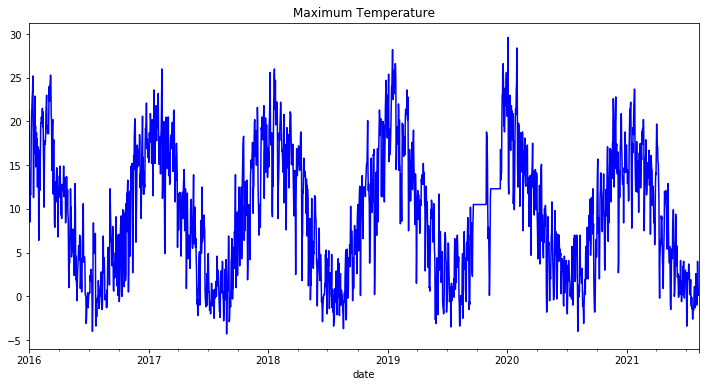

In [25]:
# display the data 
plt.figure(figsize=(12,6))
# all data points
temp.plot(title='Maximum Temperature', color='blue') 
plt.show()

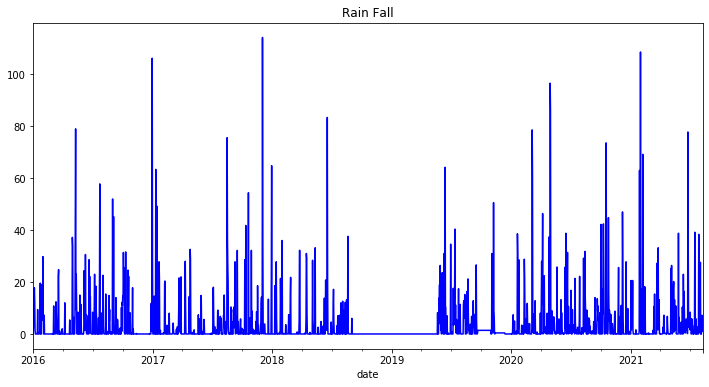

In [26]:
# display the data 
plt.figure(figsize=(12,6))
# all data points
rain.plot(title='Rain Fall', color='blue') 
plt.show()